Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [54]:
import numpy as np
import pandas as pd

In [55]:
bike_df = pd.read_csv("./hour.csv")

In [56]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [57]:
bike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


```
Regression

Linear
    count - temp, holiday, season
    count - workingday, time, is_it_office
RF
DT
KNN
```

In [58]:
bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [59]:
nb_bike_df = bike_df.drop(['instant', 'yr', 'mnth', 'weekday', 'workingday', 'atemp'], axis=1)
nb_bike_df.head()

,dteday,season,hr,holiday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,0,1,0.24,0.81,0.0,3,13,16
1,2011-01-01,1,1,0,1,0.22,0.80,0.0,8,32,40
2,2011-01-01,1,2,0,1,0.22,0.80,0.0,5,27,32
3,2011-01-01,1,3,0,1,0.24,0.75,0.0,3,10,13
4,2011-01-01,1,4,0,1,0.24,0.75,0.0,0,1,1


In [60]:
#missong values
nb_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   hr          17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weathersit  17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   hum         17379 non-null  float64
 7   windspeed   17379 non-null  float64
 8   casual      17379 non-null  int64  
 9   registered  17379 non-null  int64  
 10  cnt         17379 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.5+ MB


In [61]:
#datatime convert
nb_bike_df["dteday"] = pd.to_datetime(nb_bike_df["dteday"])
#season convert integer to categorical

# nb_bike_df["season"] = nb_bike_df["season"].astype("object")
#hr is categorical not continous

#target variable cnt, remove others

for col in ["season", "holiday","weathersit"]:
    nb_bike_df[col] = nb_bike_df[col].astype("object")

In [62]:
nb_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   hr          17379 non-null  int64         
 3   holiday     17379 non-null  object        
 4   weathersit  17379 non-null  object        
 5   temp        17379 non-null  float64       
 6   hum         17379 non-null  float64       
 7   windspeed   17379 non-null  float64       
 8   casual      17379 non-null  int64         
 9   registered  17379 non-null  int64         
 10  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 1.5+ MB


### Missing Values checks

In [63]:
nb_bike_df.isnull().any()

dteday        False
season        False
hr            False
holiday       False
weathersit    False
temp          False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [64]:
# count of missong values
nb_bike_df.shape[0]-nb_bike_df.count()

dteday        0
season        0
hr            0
holiday       0
weathersit    0
temp          0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [65]:
# correct for the missing values - check is something we expect to be continous, is categorical instead - 
# this is a sign of "?" present in the data

In [66]:
# check for duplicates
nb_bike_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Length: 17379, dtype: bool

In [67]:
nb_bike_df.duplicated().any()

False

In [68]:
# Run this for dropping duplicates if any
nb_bike_df.drop_duplicates()

,dteday,season,hr,holiday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,0,1,0.24,0.81,0.0000,3,13,16
1,2011-01-01,1,1,0,1,0.22,0.80,0.0000,8,32,40
2,2011-01-01,1,2,0,1,0.22,0.80,0.0000,5,27,32
3,2011-01-01,1,3,0,1,0.24,0.75,0.0000,3,10,13
4,2011-01-01,1,4,0,1,0.24,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,19,0,2,0.26,0.60,0.1642,11,108,119
17375,2012-12-31,1,20,0,2,0.26,0.60,0.1642,8,81,89
17376,2012-12-31,1,21,0,1,0.26,0.60,0.1642,7,83,90
17377,2012-12-31,1,22,0,1,0.26,0.56,0.1343,13,48,61


In [69]:
# Check for outliers
nb_bike_df.describe()

,hr,temp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,0.496987,0.627229,0.190098,35.676218,153.786869,189.463088
std,6.914405,0.192556,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000
50%,12.000000,0.500000,0.630000,0.194000,17.000000,115.000000,142.000000
75%,18.000000,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000
max,23.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [70]:
nb_bike_df.describe(include="all")

C:\Users\punee\AppData\Local\Temp\ipykernel_15840\1365126226.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  nb_bike_df.describe(include="all")


,dteday,season,hr,holiday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,17379,17379.0,17379.000000,17379.0,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,4.0,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,3.0,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,4496.0,NaN,16879.0,11413.0,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,11.546752,NaN,NaN,0.496987,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,NaN,6.914405,NaN,NaN,0.192556,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,NaN,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,6.000000,NaN,NaN,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000


<AxesSubplot:>

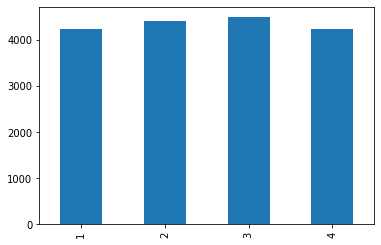

In [71]:
!pip install matplotlib --user
col = "season"
nb_bike_df[col].value_counts().sort_index().plot.bar()

In [72]:
col = "holiday"
nb_bike_df[col].value_counts().sort_index()

0    16879
1      500
Name: holiday, dtype: int64

<AxesSubplot:>

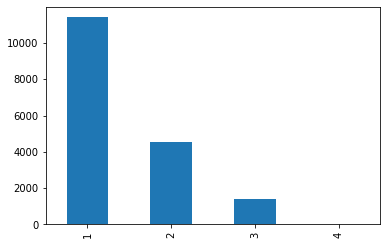

In [73]:
col = "weathersit"
nb_bike_df[col].value_counts().sort_index().plot.bar()

<AxesSubplot:>

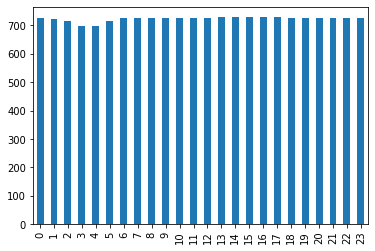

In [74]:
col = "hr"
nb_bike_df[col].value_counts().sort_index().plot.bar()

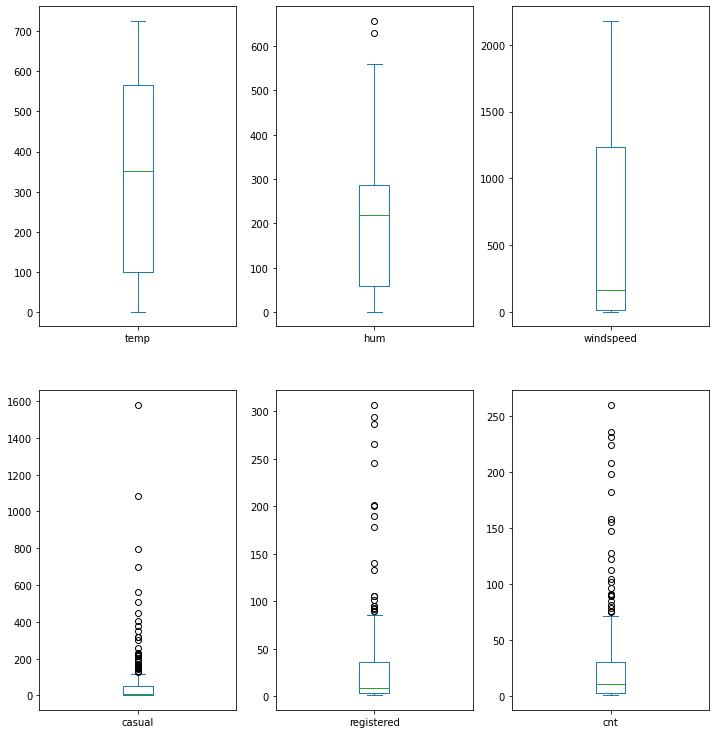

In [75]:
# outliers
import matplotlib.pyplot as plt

i = 1
cols = ["temp", "hum", "windspeed", "casual", "registered", "cnt"]
plt.figure(figsize=(12,20))
for col in cols:
    plt.subplot(3, 3, i)
    nb_bike_df[col].value_counts().sort_index().plot.box()
    # plt.title(col)
    i+=1

In [76]:
# find out what happens in windspeed outliers
nb_bike_df["windspeed"].describe()

count    17379.000000
mean         0.190098
std          0.122340
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

In [77]:
# Q3+1.5*IQR
iqr = nb_bike_df["windspeed"].describe()["75%"] - nb_bike_df["windspeed"].describe()["25%"]
max_th = (1.5*iqr)+nb_bike_df["windspeed"].describe()["75%"]
max_th


0.4775

In [78]:
# find the count all the points that are above the threshold of IQR
nb_bike_df[nb_bike_df["windspeed"] > max_th].shape

(342, 11)

### Mean IQR

In [84]:
nb_bike_df[nb_bike_df["windspeed"] > max_th]["cnt"].mean()

181.02631578947367

In [85]:
nb_bike_df[nb_bike_df["windspeed"] <= max_th]["cnt"].mean()

189.63244702705876

### Median IQR

In [86]:
nb_bike_df[nb_bike_df["windspeed"] > max_th]["cnt"].median()

145.5

In [87]:
nb_bike_df[nb_bike_df["windspeed"] <= max_th]["cnt"].median()

142.0

In [89]:
# Drop the predict values 
nb_bike_df.drop(["casual", "registered"], inplace=True, axis=1)

In [90]:
nb_bike_df.head()

,dteday,season,hr,holiday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,0,1,0.24,0.81,0.0,16
1,2011-01-01,1,1,0,1,0.22,0.80,0.0,40
2,2011-01-01,1,2,0,1,0.22,0.80,0.0,32
3,2011-01-01,1,3,0,1,0.24,0.75,0.0,13
4,2011-01-01,1,4,0,1,0.24,0.75,0.0,1


In [91]:
### Feature Engineering
nb_bike_df["day"] = nb_bike_df["dteday"].dt.day
nb_bike_df["year"] = nb_bike_df["dteday"].dt.year
nb_bike_df["month"] = nb_bike_df["dteday"].dt.month
nb_bike_df.head()

,dteday,season,hr,holiday,weathersit,temp,hum,windspeed,cnt,day,year,month
0,2011-01-01,1,0,0,1,0.24,0.81,0.0,16,1,2011,1
1,2011-01-01,1,1,0,1,0.22,0.80,0.0,40,1,2011,1
2,2011-01-01,1,2,0,1,0.22,0.80,0.0,32,1,2011,1
3,2011-01-01,1,3,0,1,0.24,0.75,0.0,13,1,2011,1
4,2011-01-01,1,4,0,1,0.24,0.75,0.0,1,1,2011,1


In [94]:
## extract if it is weekend
nb_bike_df["dteday"].dt.weekday.value_counts()

5    2512
6    2502
4    2487
0    2479
2    2475
3    2471
1    2453
Name: dteday, dtype: int64

In [96]:
nb_bike_df["weekday"] = nb_bike_df["dteday"].dt.weekday
nb_bike_df["is_weekend"] = nb_bike_df["weekday"]
nb_bike_df["is_weekend"] = nb_bike_df["is_weekend"].replace({0:0, 1:0, 2:0, 3:0, 4:0, 5:1, 6:1})

In [97]:
nb_bike_df.head()

,dteday,season,hr,holiday,weathersit,temp,hum,windspeed,cnt,day,year,month,weekday,is_weekend
0,2011-01-01,1,0,0,1,0.24,0.81,0.0,16,1,2011,1,5,1
1,2011-01-01,1,1,0,1,0.22,0.80,0.0,40,1,2011,1,5,1
2,2011-01-01,1,2,0,1,0.22,0.80,0.0,32,1,2011,1,5,1
3,2011-01-01,1,3,0,1,0.24,0.75,0.0,13,1,2011,1,5,1
4,2011-01-01,1,4,0,1,0.24,0.75,0.0,1,1,2011,1,5,1


### ML Modelling

In [98]:
# !pip install sklearn --user

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.4/7.4 MB 15.7 MB/s eta 0:00:00
     ---------------------------------------- 36.9/36.9 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 kB 3.8 MB/s eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


In [ ]:
## target variable create
## Encoding
## train test split

In [99]:
nb_bike_df.drop('year dteday day month weekday hr'.split(), inplace=True, axis=1)

In [100]:
nb_bike_df.head()

,season,holiday,weathersit,temp,hum,windspeed,cnt,is_weekend
0,1,0,1,0.24,0.81,0.0,16,1
1,1,0,1,0.22,0.80,0.0,40,1
2,1,0,1,0.22,0.80,0.0,32,1
3,1,0,1,0.24,0.75,0.0,13,1
4,1,0,1,0.24,0.75,0.0,1,1


In [103]:
encoded_data = pd.get_dummies(nb_bike_df[["season", "weathersit"]], prefix=["season", "weathersit"], drop_first=True)

c:\Python39\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [105]:
encoded_data.head()

,season_2,season_3,season_4,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [107]:
final_data = pd.concat([nb_bike_df, encoded_data], axis=1)
final_data.head()

,season,holiday,weathersit,temp,hum,windspeed,cnt,is_weekend,season_2,season_3,season_4,weathersit_2,weathersit_3,weathersit_4
0,1,0,1,0.24,0.81,0.0,16,1,0,0,0,0,0,0
1,1,0,1,0.22,0.80,0.0,40,1,0,0,0,0,0,0
2,1,0,1,0.22,0.80,0.0,32,1,0,0,0,0,0,0
3,1,0,1,0.24,0.75,0.0,13,1,0,0,0,0,0,0
4,1,0,1,0.24,0.75,0.0,1,1,0,0,0,0,0,0


In [108]:
final_data.drop("season weathersit".split(), axis=1, inplace=True)

In [109]:
final_data.head()

,holiday,temp,hum,windspeed,cnt,is_weekend,season_2,season_3,season_4,weathersit_2,weathersit_3,weathersit_4
0,0,0.24,0.81,0.0,16,1,0,0,0,0,0,0
1,0,0.22,0.80,0.0,40,1,0,0,0,0,0,0
2,0,0.22,0.80,0.0,32,1,0,0,0,0,0,0
3,0,0.24,0.75,0.0,13,1,0,0,0,0,0,0
4,0,0.24,0.75,0.0,1,1,0,0,0,0,0,0


In [110]:
y = final_data.pop("cnt")

In [111]:
final_data.head()

,holiday,temp,hum,windspeed,is_weekend,season_2,season_3,season_4,weathersit_2,weathersit_3,weathersit_4
0,0,0.24,0.81,0.0,1,0,0,0,0,0,0
1,0,0.22,0.80,0.0,1,0,0,0,0,0,0
2,0,0.22,0.80,0.0,1,0,0,0,0,0,0
3,0,0.24,0.75,0.0,1,0,0,0,0,0,0
4,0,0.24,0.75,0.0,1,0,0,0,0,0,0


In [112]:
### train test split]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data, y, test_size=0.3, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12165, 11) (5214, 11) (12165,) (5214,)


In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(X_train)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [114]:
X_train_pca

array([[-0.40015197,  0.72879531, -0.53053733,  0.54535169, -0.088517  ,
        -0.11711887],
       [-0.63165049, -0.64711932, -0.50736695,  0.41559794,  0.04692991,
        -0.3112274 ],
       [-0.2180091 ,  0.80005628, -0.16276412, -0.35236895, -0.22621876,
        -0.02760481],
       ...,
       [ 0.89349765, -0.13649532, -0.21706992, -0.18630306, -0.14577877,
        -0.13133716],
       [-0.01975495,  0.00408127, -0.16453365, -0.32874136, -0.13227402,
         0.504336  ],
       [-0.66763778, -0.65679438, -0.50478261,  0.41478981,  0.06485042,
        -0.24431682]])

In [121]:
### Linear Regression
from sklearn.linear_model import LinearRegression
regressor_PCA = LinearRegression()
regressor_PCA.fit(X_train_pca, y_train)
y_pred_train_wPCA = regressor_PCA.predict(X_train_pca)
y_pred_test_wPCA = regressor_PCA.predict(X_test_pca)


print("Coeff", regressor_PCA.coef_)
print("Intercept", regressor_PCA.intercept_)

from sklearn import metrics
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_wPCA))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_wPCA))

print("RMSE test:", RMSE_test)
print("RMSE train:", RMSE_train)

Coeff [  43.5351054     3.7431798    -1.92170545  -14.69207616 -125.37647989
 -189.25424345]
Intercept 191.23764899301275
RMSE test: 165.53636008373184
RMSE train: 170.06125236352997


([<matplotlib.axis.XTick at 0x1575cf6de20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

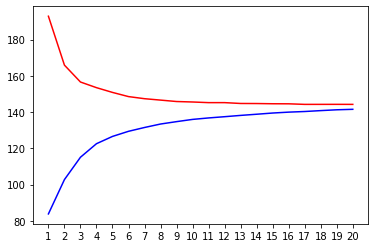

In [131]:
## KNN REgressor on all Columns without PCA

### Linear Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
RMSE_test_list= []
RMSE_train_list = []
for k in range(1, 21):
    knnr = KNeighborsRegressor(n_neighbors=k)
    knnr.fit(X_train, y_train)
    knnr_pred_test = knnr.predict(X_test)
    knnr_pred_train = knnr.predict(X_train)

    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, knnr_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, knnr_pred_test))

    RMSE_test_list.append(RMSE_test)
    RMSE_train_list.append(RMSE_train)

plt.plot(range(1, 21), RMSE_test_list, color="red")
plt.plot(range(1, 21), RMSE_train_list, color="blue")
plt.xticks(range(1, 21))

In [ ]:
### Mode deployment required steps

# Final code to call when deployed

import pickle
import numpy as np

nb_bike_df = bike_df.drop(['instant', 'yr', 'mnth', 'weekday', 'workingday', 'atemp'], axis=1)
nb_bike_df.head()

nb_bike_df["dteday"] = pd.to_datetime(nb_bike_df["dteday"])
for col in ["season", "holiday","weathersit"]:
    nb_bike_df[col] = nb_bike_df[col].astype("object")

nb_bike_df.drop(["casual", "registered"], inplace=True, axis=1)

nb_bike_df["day"] = nb_bike_df["dteday"].dt.day
nb_bike_df["year"] = nb_bike_df["dteday"].dt.year
nb_bike_df["month"] = nb_bike_df["dteday"].dt.month
nb_bike_df["weekday"] = nb_bike_df["dteday"].dt.weekday
nb_bike_df["is_weekend"] = nb_bike_df["weekday"]
nb_bike_df["is_weekend"] = nb_bike_df["is_weekend"].replace({0:0, 1:0, 2:0, 3:0, 4:0, 5:1, 6:1})

# change this code
encoded_data = pd.get_dummies(nb_bike_df[["season", "weathersit"]], prefix=["season", "weathersit"], drop_first=True)

final_data = pd.concat([nb_bike_df, encoded_data], axis=1)

final_data.drop("season weathersit".split(), axis=1, inplace=True)

from sklearn.decomposition import PCA
# import thr pickle file of the model from the PCA
X_new_pca = pca.transform(X_new)